# UNCC HW 7
# Andrew Kling

#### Observable Trends:
#### 1. NY Times is the only tracked online publication that on average had more tweets with a more negative sentiment in its past 100 tweets.
#### 2.  The scatter plot shows that the majority of tweets by these news outlets are determined to be a neutral sentiment.
#### 3.  Surprisingly it looks like that on average the majority of tweets by all of these news organizations, except the NY Times, have a positive sentiment.

In [62]:
%matplotlib inline

# Dependencies
import tweepy
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')
plt.rcParams['figure.figsize'] = [10, 7]
import matplotlib.patches as mpatches

output_file = "Tweet_Sentiment_Analysis.csv"

# Import and Initialize Sentiment Analyzer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

# Twitter API Keys
from config_mine import (consumer_key, 
                    consumer_secret, 
                    access_token, 
                    access_token_secret)

# Setup Tweepy API Authentication
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

In [65]:
# Target Accounts:BBC, CBS, CNN, Fox, and New York times.
target_users = ["@BBC","@CBS","@CNN","@FoxNews","@nytimes"]

# Variables for holding sentiments
sentiments = []

for user in target_users:
    # Counter
    counter = 1   

    # Variable for max_id
    oldest_tweet = None

    # Loop through 5 pages of tweets (total 100 tweets)
    for x in range(5):

        # Get all tweets from home feed
        public_tweets = api.user_timeline(user, max_id = oldest_tweet)

        # Loop through all tweets 
        for tweet in public_tweets:
            # Run Vader Analysis on each tweet
            results = analyzer.polarity_scores(tweet["text"])
            compound = results["compound"]
            positive = results["pos"]
            negative = results["neg"]
            neutral = results["neu"]
            text = tweet["text"]
            tweets_ago = counter

            # Get Tweet ID, subtract 1, and assign to oldest_tweet
            oldest_tweet = tweet['id'] - 1

            # Add sentiments for each tweet into a list
            sentiments.append({"User":user,
                               "Date": tweet["created_at"], 
                               "Compound": compound,
                               "Tweets Ago": counter,
                               "Positive":positive,
                               "Negative":negative,
                               "Neutral":neutral,
                               "Text":text})

            # Add to counter 
            counter += 1

In [66]:
# Convert sentiments to DataFrame
sentiments_pd = pd.DataFrame.from_dict(sentiments)
sentiments_pd.to_csv(output_file)

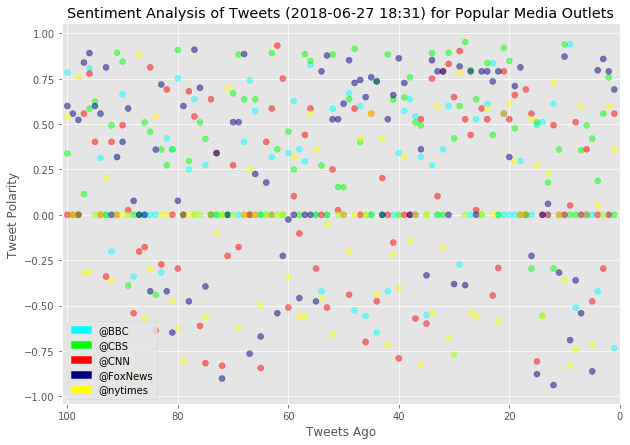

<Figure size 720x504 with 0 Axes>

In [67]:
# Create scatter plot
colors = {"@BBC":"cyan","@CBS":"lime","@CNN":"red","@FoxNews":"navy","@nytimes":"yellow"} 
x_vals = sentiments_pd["Tweets Ago"]
y_vals = sentiments_pd["Compound"]
plt.scatter(x_vals,
         y_vals, marker="o",c=sentiments_pd["User"].apply(lambda x: colors[x]),
         alpha=0.5)

# # Incorporate the other graph properties
now = datetime.now()
now = now.strftime("%Y-%m-%d %H:%M")
plt.title(f"Sentiment Analysis of Tweets ({now}) for Popular Media Outlets")
plt.xlim([x_vals.max()+1,x_vals.min()-1]) #Bonus
plt.ylabel("Tweet Polarity")
plt.xlabel("Tweets Ago")

bbc = mpatches.Patch(color="cyan", label="@BBC")
cbs = mpatches.Patch(color="lime", label="@CBS")
cnn = mpatches.Patch(color="red", label="@CNN")
fox = mpatches.Patch(color="navy", label="@FoxNews")
nyt = mpatches.Patch(color="yellow", label="@nytimes")


plt.legend(handles=[bbc,cbs,cnn,fox,nyt])

plt.show()

plt.figure().savefig("Tweet Sentiment Scatter Plot.png")

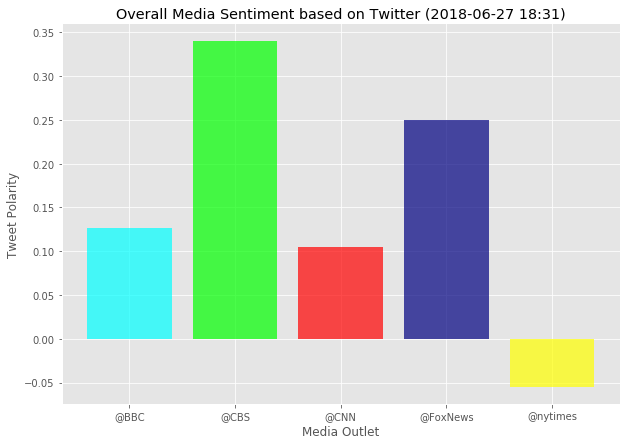

<Figure size 720x504 with 0 Axes>

In [68]:
# Create bar plot
aggregate_sentiments_df = sentiments_pd.groupby("User").mean()
aggregate_sentiments_df = aggregate_sentiments_df.reset_index()
x_axis = aggregate_sentiments_df["User"]#np.arange(5)
plt.bar(x_axis,aggregate_sentiments_df["Compound"],color=aggregate_sentiments_df["User"].apply(lambda x: colors[x]),alpha = 0.7)
plt.title(f"Overall Media Sentiment based on Twitter ({now})")
plt.ylabel('Tweet Polarity')
plt.xlabel('Media Outlet')

plt.show()
plt.figure().savefig("Tweet Sentiment Bar Chart.png")